In [1]:
import pandas as pd

In [2]:
balancing_df = pd.read_csv('../Datasets/oracle-data/20201001_20201231_NRV-cooperation_13112020_125032.csv', delimiter=';')

In [3]:
balancing_df.set_index(pd.to_datetime(balancing_df['DATE'] + ' ' + balancing_df['TIME_FROM']), drop=True, inplace=True)

In [4]:
balancing_df.drop(columns=['DATE', 'TIME_FROM', 'TIME_TO', 'IDAEP_GERMANY_COMMENT', 'IDAEP_GERMANY_VALUE_QA_[EUR/MWH]'], inplace=True)

In [5]:
balancing_df = balancing_df.apply(lambda x: x.str.replace(',','.'))

In [6]:
balancing_df['IDAEP_GERMANY_VALUE_OP_[EUR/MWH]'] = balancing_df['IDAEP_GERMANY_VALUE_OP_[EUR/MWH]'].astype(float)

In [7]:
balancing_aligned = balancing_df.loc['2020-10-17':'2020-11-3']

In [8]:
balancing_aligned_non_negative_rolling = balancing_aligned.copy()

for idx, i in enumerate(balancing_aligned['IDAEP_GERMANY_VALUE_OP_[EUR/MWH]']):
    if idx == 0:
        pass
    else:
        if i<0:
            balancing_aligned_non_negative_rolling.iloc[idx] = last_price
        else:
            last_price = i


(<AxesSubplot:>, <AxesSubplot:>)

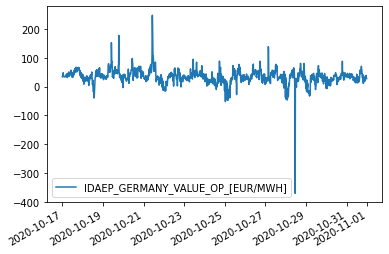

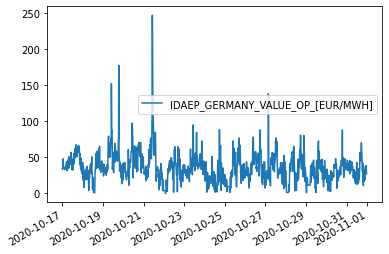

In [9]:
balancing_aligned.plot(), balancing_aligned_non_negative_rolling.plot()